In [11]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Plot the parameters of OBS Weibull results fo QC

In [12]:
QC_method = 'QCv1_Flag1'
# QC_method = 'QCv1_Flag_Rec'

In [13]:
# dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges', 'QC')
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges', 'QC_MIX')

In [14]:
METADATA = pd.read_csv(os.path.join(dir_base, 'METADATA', 'METADATA_INTENSE_UPDATE.csv'))
METADATA.head(2)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dir_read = os.path.join(dir_base, 'data_1dy', 'data')
regions_ISO = sorted([d for d in os.listdir(dir_read) if os.path.isdir(os.path.join(dir_read, d))])
regions_ISO

['IT-210',
 'IT-230',
 'IT-250',
 'IT-321',
 'IT-322',
 'IT-340',
 'IT-360',
 'IT-420',
 'IT-450',
 'IT-520',
 'IT-550',
 'IT-570',
 'IT-620',
 'IT-650',
 'IT-670',
 'IT-720',
 'IT-750',
 'IT-770',
 'IT-780',
 'IT-820',
 'IT-880']

In [21]:
dict_N = {}
dict_C = {}
dict_W = {}

for rr in range(len(regions_ISO)):#len(regions_ISO)
    region_ = regions_ISO[rr] 
    METADATA_clear = METADATA[METADATA['ISO']==region_].reset_index(inplace=False)

    print(f'{rr}: Region: {region_} has {len(METADATA_clear)} stations')

    N, C, W = [], [], []
    for nn in range(len(METADATA_clear)):#len(METADATA_clear)

        filename = f'{METADATA_clear['File'].values[nn]}'
        STATS_pd = pd.read_csv(os.path.join(dir_base, 'DATA_1dy', 'statistics', QC_method, region_, filename))
        STATS_pd = STATS_pd[(STATS_pd['Year']>=2002)&(STATS_pd['Year']<=2023)]
        
        if len(STATS_pd) >= 8:
            N_ = STATS_pd.N.values
            C_ = STATS_pd.C.values
            W_ = STATS_pd.W.values
            
            N.extend(N_)
            C.extend(C_)
            W.extend(W_)

    dict_N[region_] = N
    dict_C[region_] = C
    dict_W[region_] = W

df_N = pd.DataFrame({k: pd.Series(v) for k, v in dict_N.items()})
df_C = pd.DataFrame({k: pd.Series(v) for k, v in dict_C.items()})
df_W = pd.DataFrame({k: pd.Series(v) for k, v in dict_W.items()})

# df_W = df_W.mask(df_W > 2, np.nan)
# df_C = df_C.mask(df_W > 2, np.nan)
# df_N = df_N.mask(df_W > 2, np.nan)

0: Region: IT-210 has 38 stations
1: Region: IT-230 has 69 stations
2: Region: IT-250 has 228 stations
3: Region: IT-321 has 97 stations
4: Region: IT-322 has 57 stations
5: Region: IT-340 has 213 stations
6: Region: IT-360 has 203 stations
7: Region: IT-420 has 153 stations
8: Region: IT-450 has 439 stations
9: Region: IT-520 has 408 stations
10: Region: IT-550 has 65 stations
11: Region: IT-570 has 157 stations
12: Region: IT-620 has 213 stations
13: Region: IT-650 has 38 stations
14: Region: IT-670 has 22 stations
15: Region: IT-720 has 153 stations
16: Region: IT-750 has 36 stations
17: Region: IT-770 has 37 stations
18: Region: IT-780 has 158 stations
19: Region: IT-820 has 106 stations
20: Region: IT-880 has 95 stations


In [22]:
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_N[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]
    print(f'Region {regions_ISO[pos]} has {len(pre_tmp)} values')

Region IT-210 has 809 values
Region IT-230 has 1125 values
Region IT-250 has 3086 values
Region IT-321 has 1107 values
Region IT-322 has 1007 values
Region IT-340 has 4060 values
Region IT-360 has 3273 values
Region IT-420 has 2204 values
Region IT-450 has 6186 values
Region IT-520 has 7414 values
Region IT-550 has 1233 values
Region IT-570 has 1697 values
Region IT-620 has 3325 values
Region IT-650 has 232 values
Region IT-670 has 403 values
Region IT-720 has 3028 values
Region IT-750 has 496 values
Region IT-770 has 640 values
Region IT-780 has 2315 values
Region IT-820 has 2070 values
Region IT-880 has 1498 values


Text(0.5, 0, 'Regions')

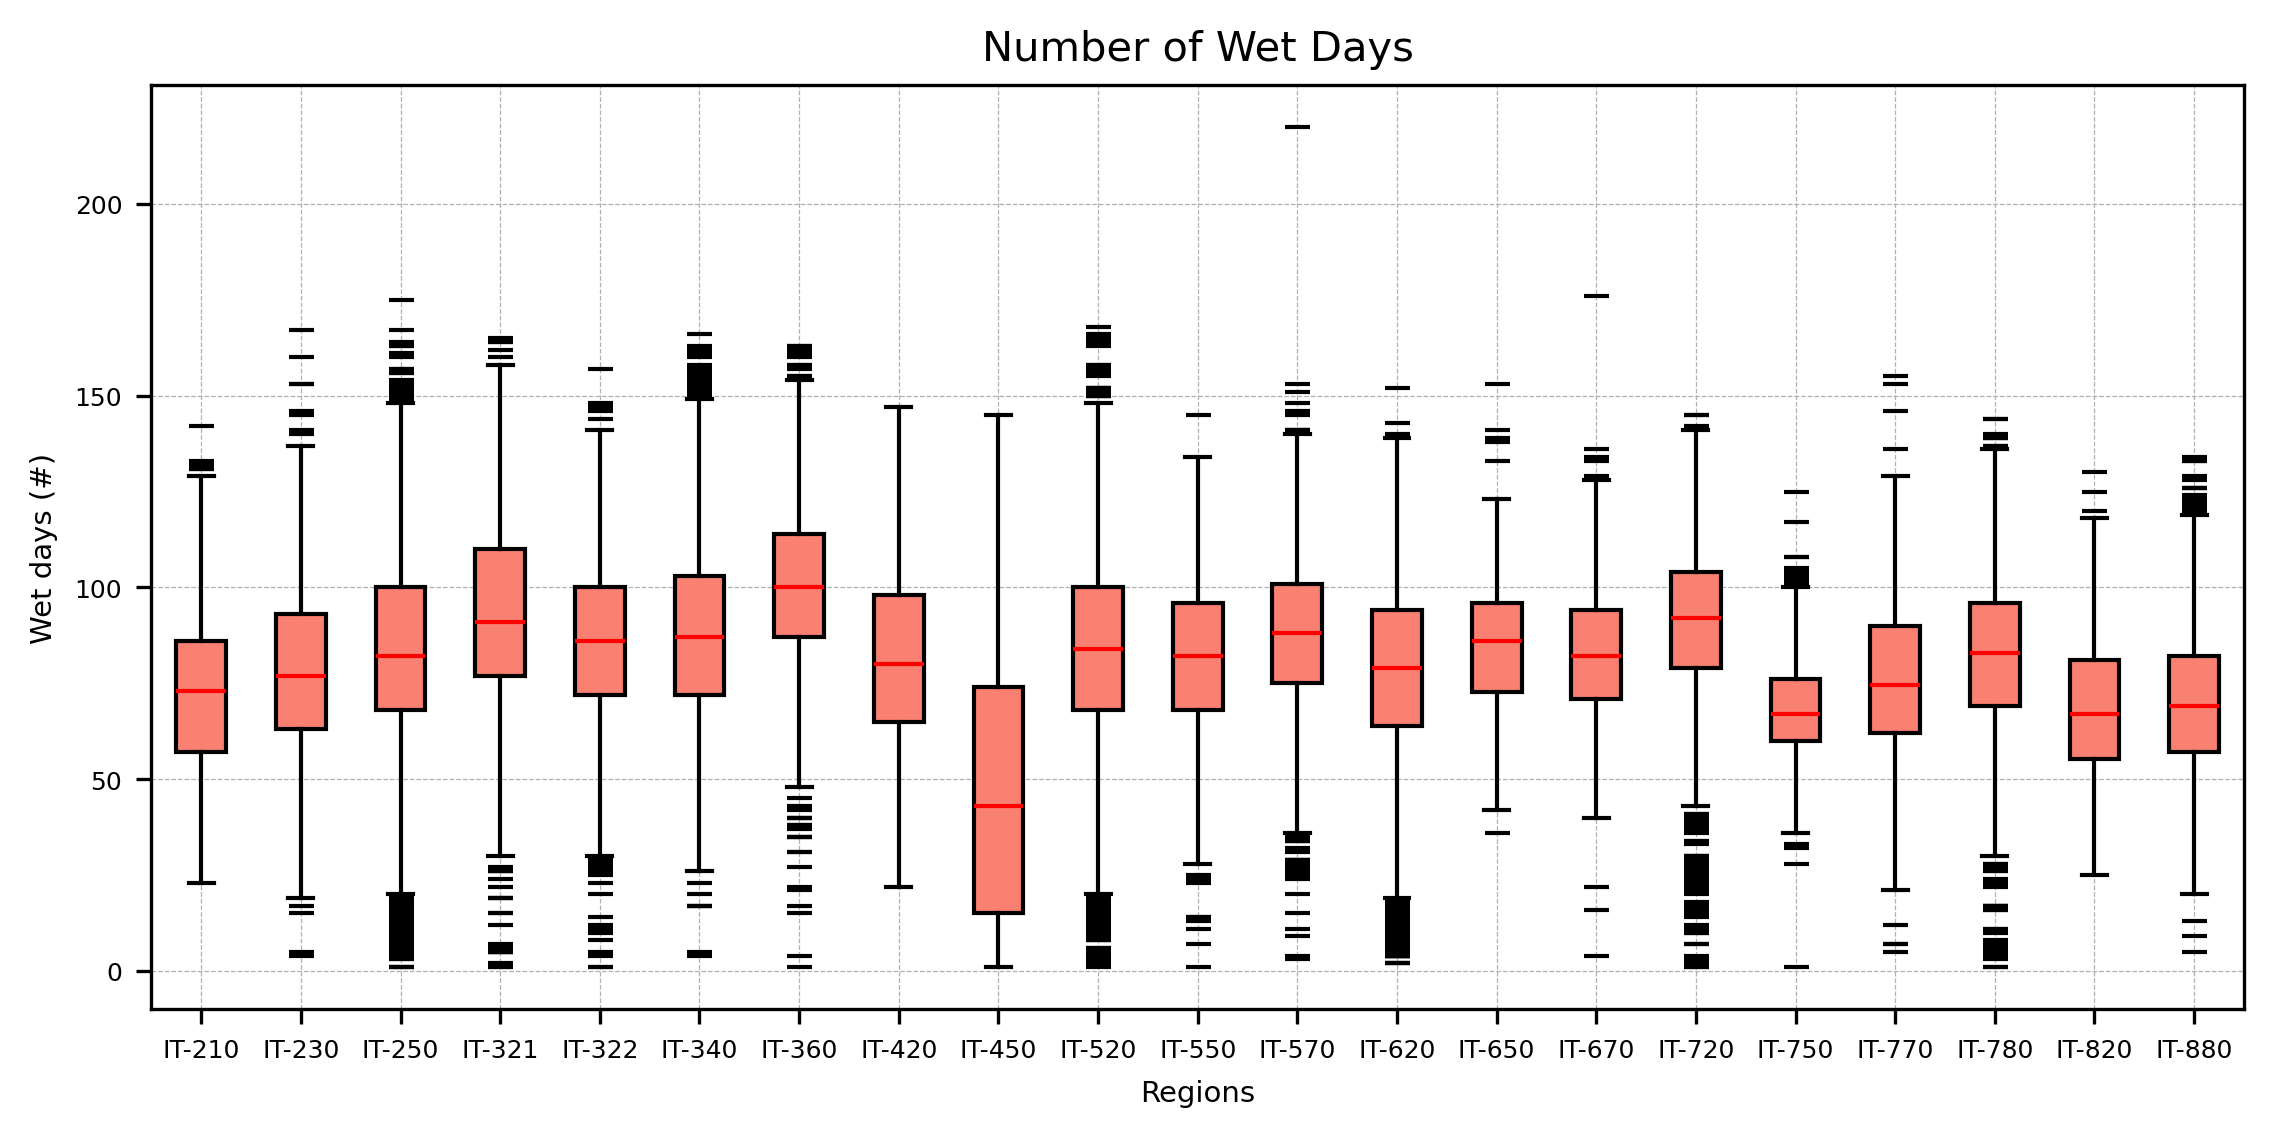

In [23]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_N[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xlim(-1,41)
ax1.set_xticks(np.arange(0,42,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Number of Wet Days', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

Text(0.5, 0, 'Regions')

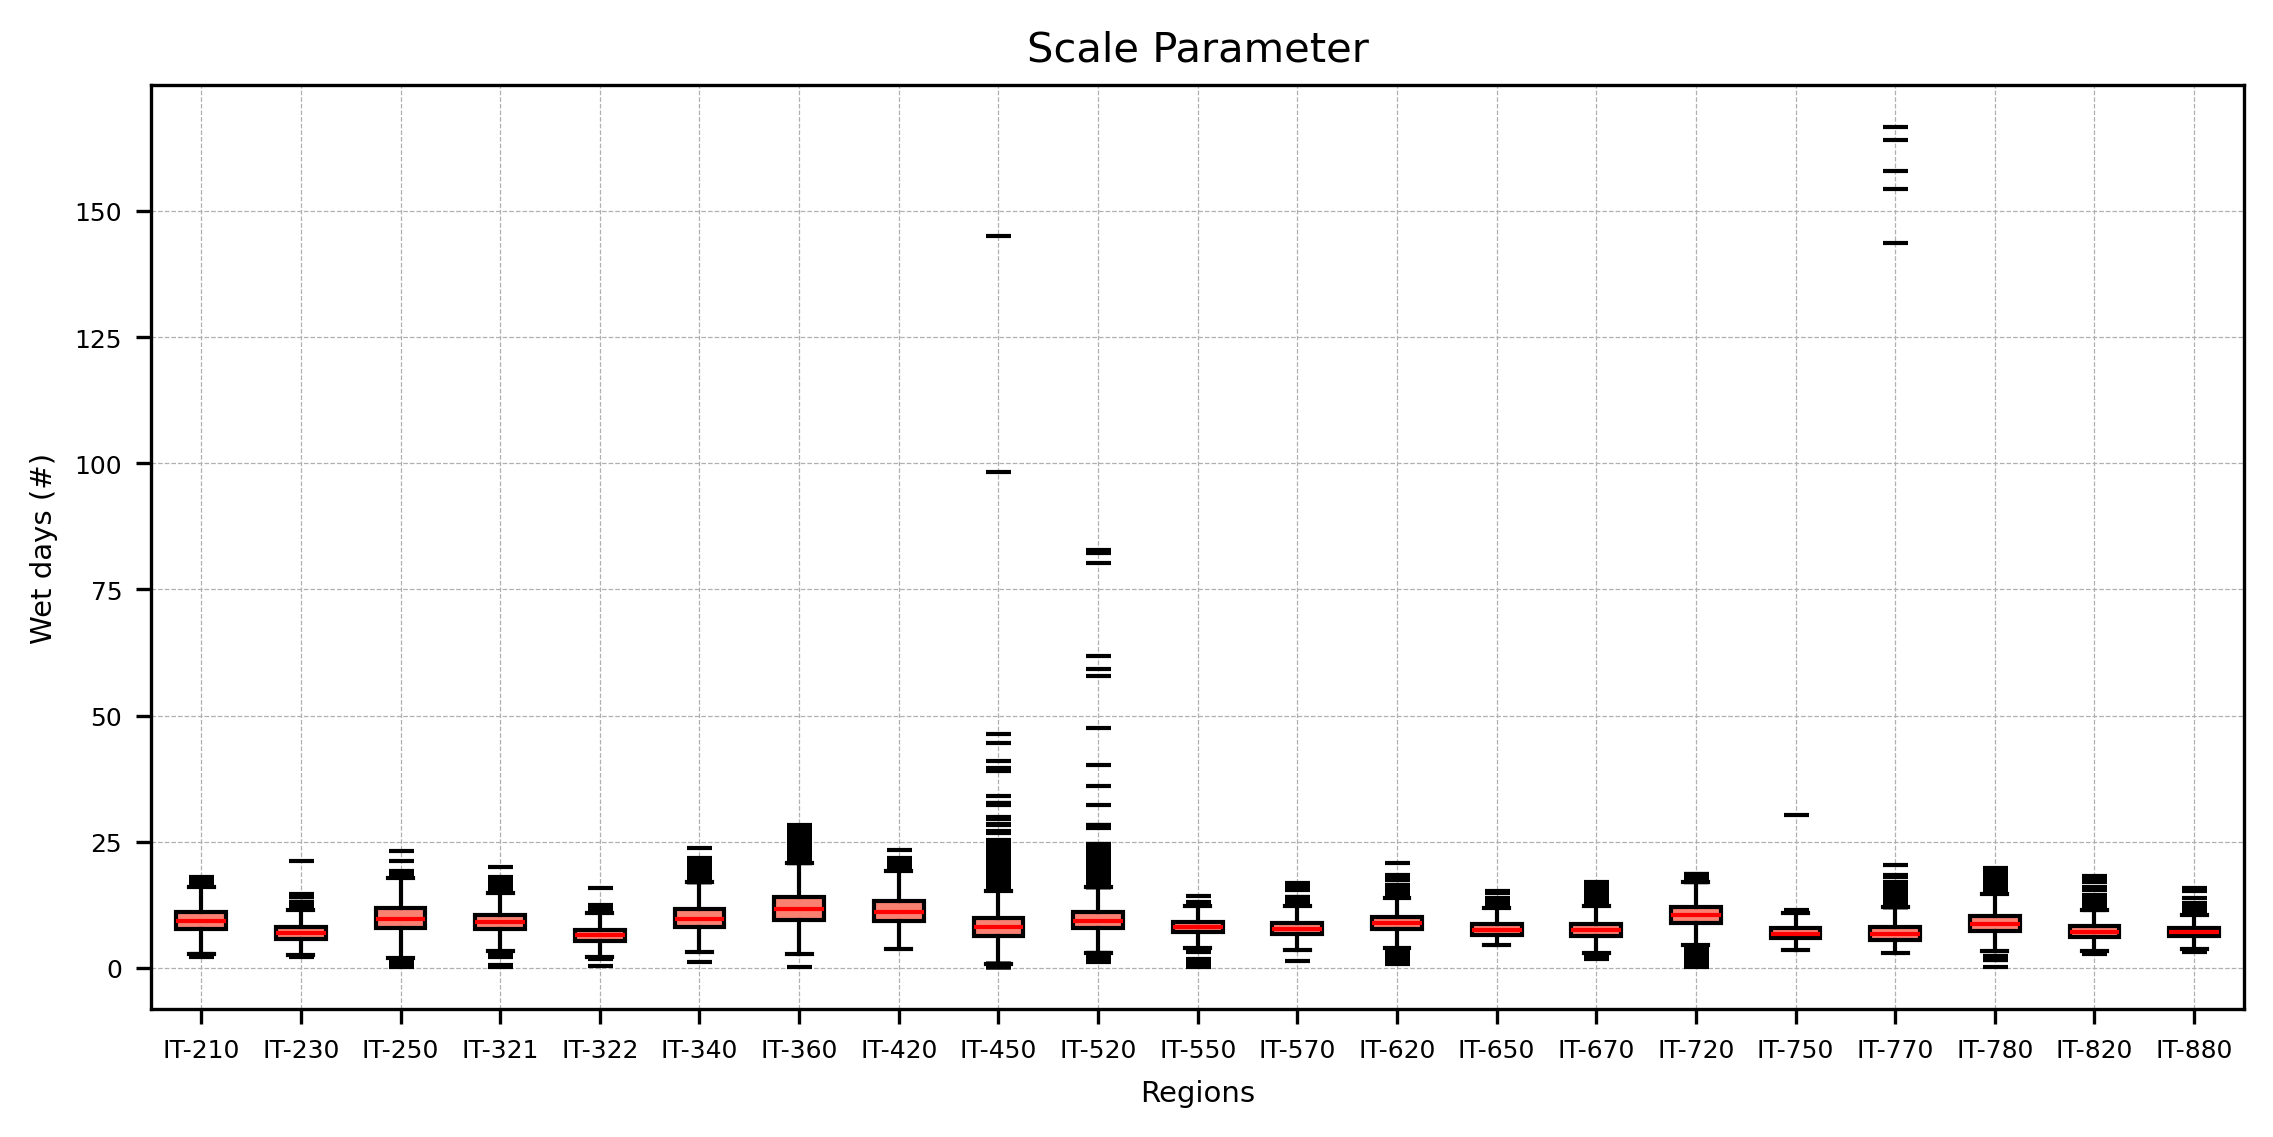

In [24]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_C[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xlim(-1,41)
ax1.set_xticks(np.arange(0,42,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Scale Parameter', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

Text(0.5, 0, 'Regions')

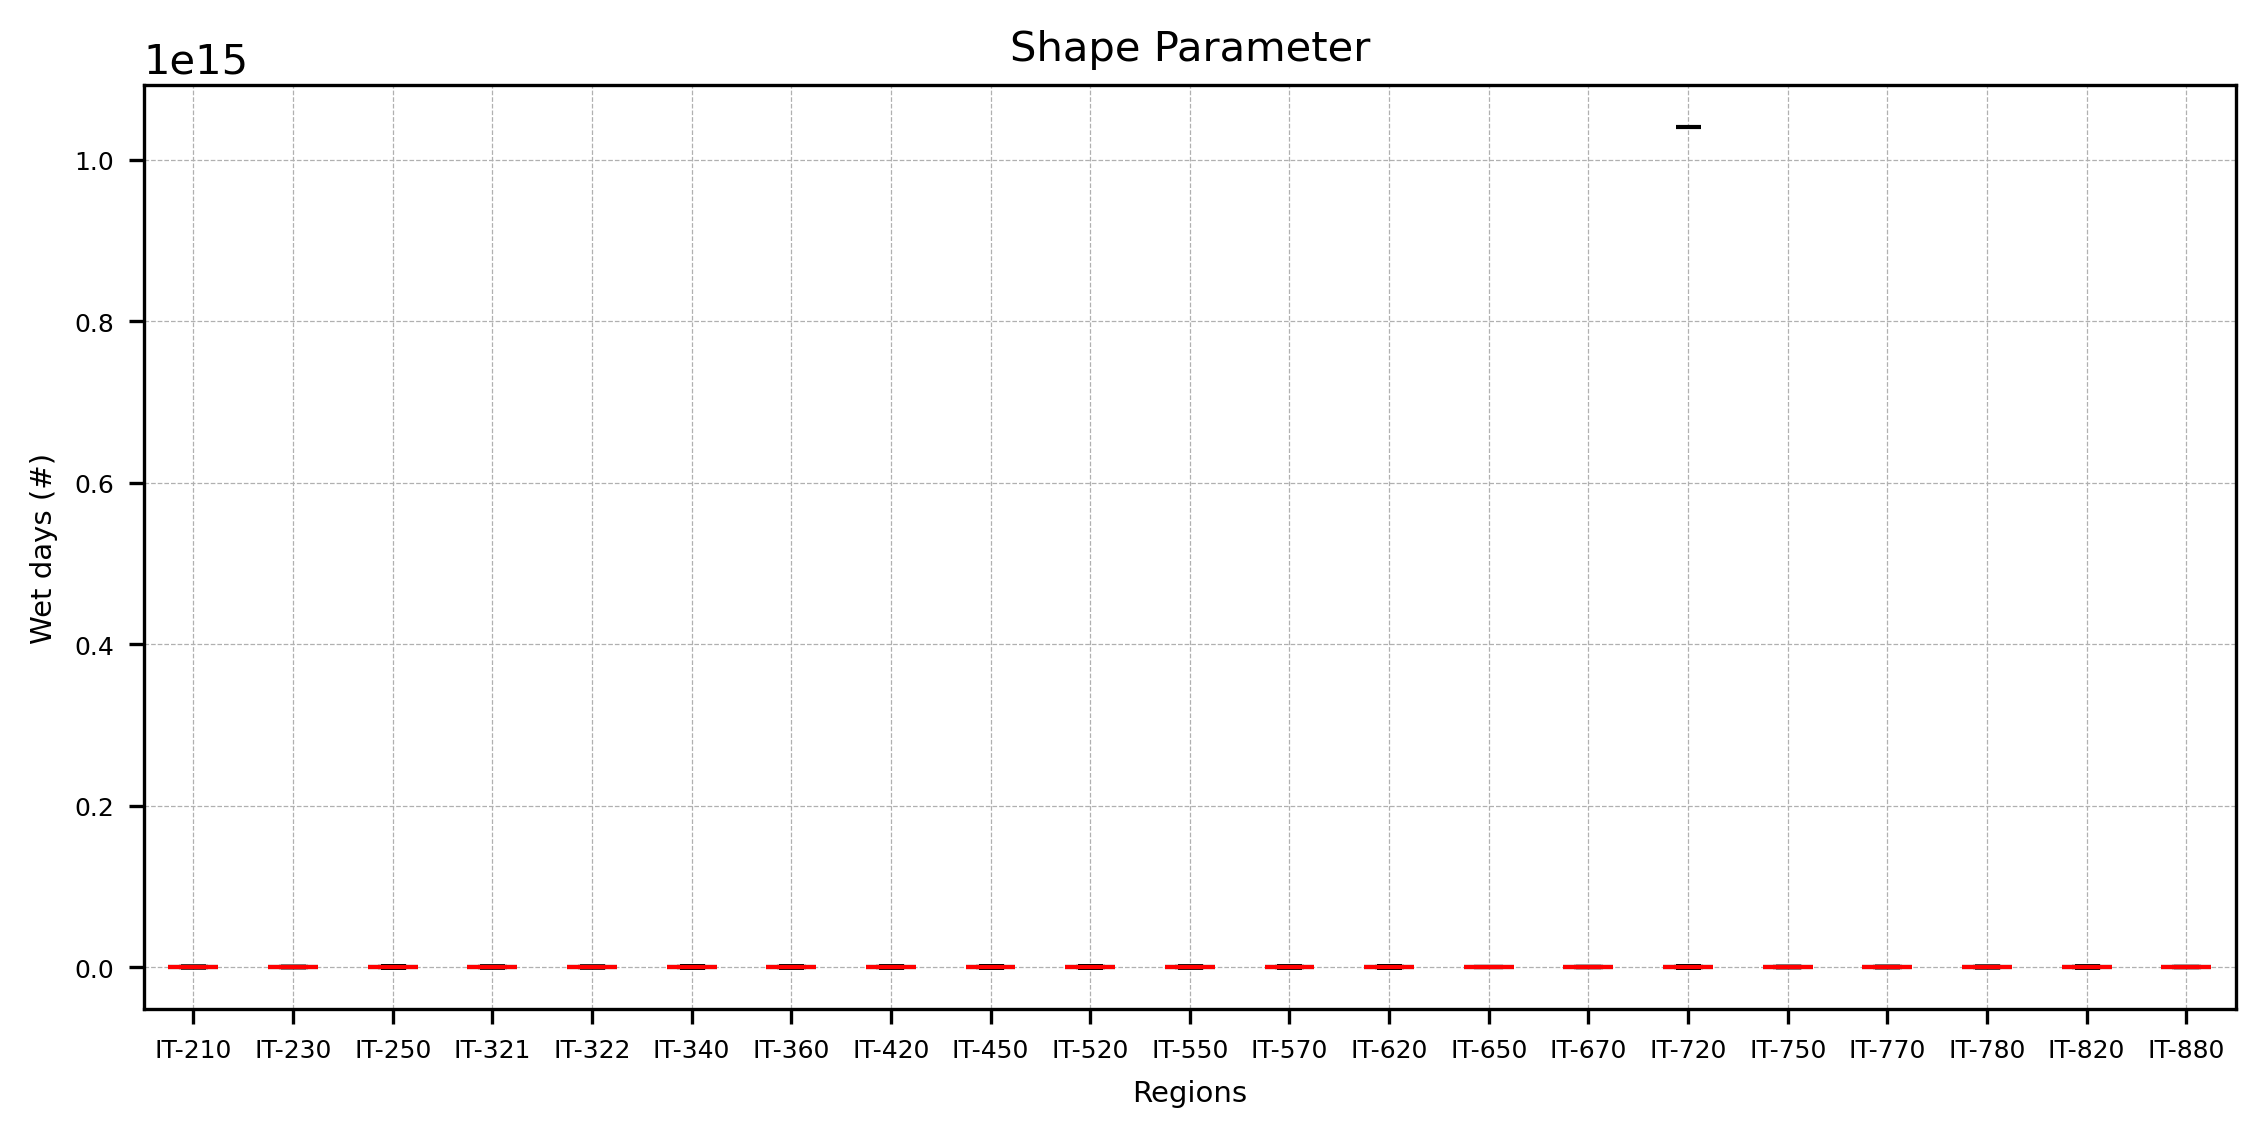

In [25]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_W[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xlim(-1,41)
ax1.set_xticks(np.arange(0,42,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Shape Parameter', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)